# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [5]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

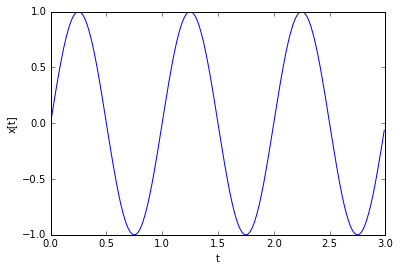

In [6]:
f = 1
t = np.arange(0, 3.0, 0.01)
x = np.sin(2*np.pi*f*t)

plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x[t]")


Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

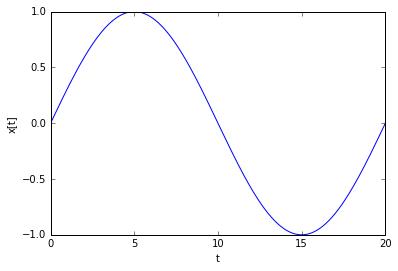

In [23]:
f = 1
fs = 20
t = np.arange(0.0, 20.0, 0.01)
x = np.sin(2*np.pi*(f/fs)*t)

plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x[t]")

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

In [8]:
def step(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
    
    s = np.zeros((N, ))
    for n in range (n, N):
        s[n] = 1
    
    return s

<Container object of 3 artists>

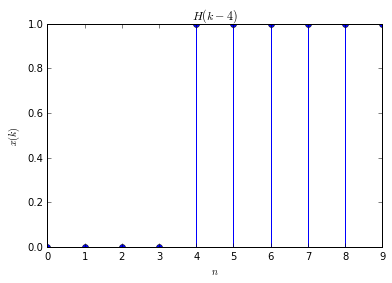

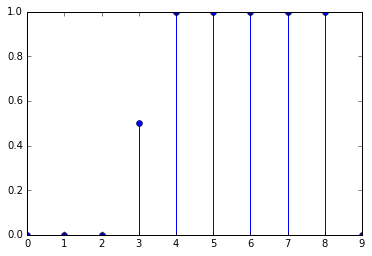

In [9]:
N = 10
x = step(4,N)

plt.stem(x)
plt.xlabel(r'$n$')
plt.ylabel(r'$x(k)$')
plt.title('$H(k-4)$')

y = np.zeros((N, ))

for i in range (0, N-1):
    y[i] = (x[i] + x[i+1])/2 

plt.figure()
plt.stem(y)

**1.2** Propose a modification to obtain a causal version

<Container object of 3 artists>

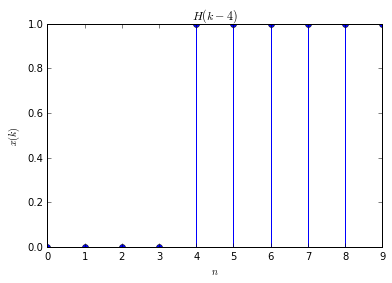

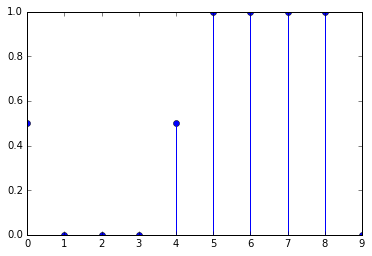

In [10]:
N = 10
x = step(4,N)

plt.stem(x)
plt.xlabel(r'$n$')
plt.ylabel(r'$x(k)$')
plt.title('$H(k-4)$')

y = np.zeros((N, ))

for i in range (0, N-1):
    y[i] = (x[i] + x[i-1])/2 

plt.figure()
plt.stem(y)

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [11]:
def prim(f):
    
    fk = np.zeros((len(f),))
    fk[0] = f[0]
    for i in range (1, len(f)):
        fk[i] = fk[i-1]+ f[i]

    return fk



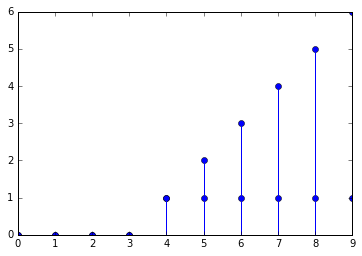

In [24]:
x = step(4,N)
plt.stem(x)
signal = prim(x)
plt.stem(signal)
plt.show()

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

In [29]:
def dirac(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
            
    s = np.zeros((N, ))
    s[n] = 1
    
    return s



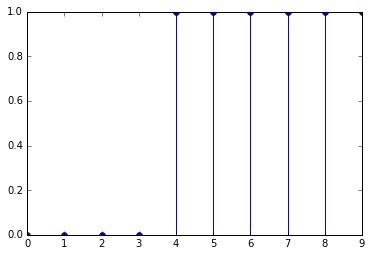

In [31]:
x2 = dirac(4,N)

signal2 = prim(x2)
plt.stem(signal2)
plt.show()


**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

<Container object of 3 artists>

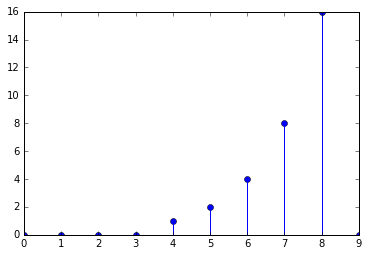

In [15]:
y2 = np.zeros((N, ))

for i in range (1, N-1):
    y2[i] = x2[i] + 2*y2[i-1] 


plt.stem(y2)

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

<Container object of 3 artists>

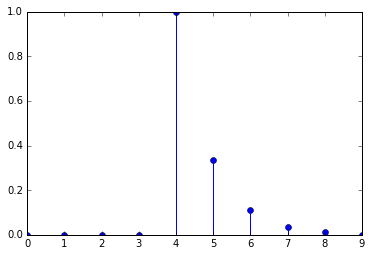

In [16]:
y3 = np.zeros((N, ))

for i in range (1, N-1):
    y3[i] = x2[i] + (1./3.)*y3[i-1]

plt.stem(y3)


Comments your observations


## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


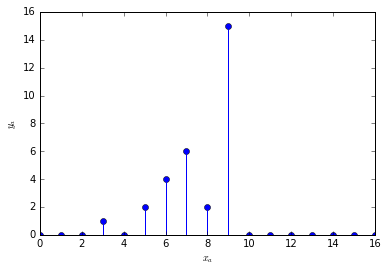

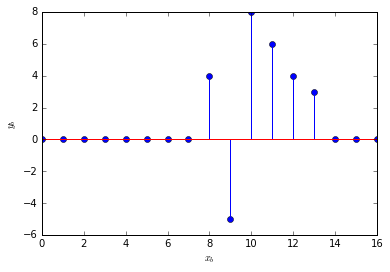

In [28]:
x_a = np.array([0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0])
x_b = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 1, 0, 0, 0, 0])

y_a = np.zeros((len(x_a), ))

for i in range (1, len(x_a)-1):
    y_a[i] = 3*x_a[i-1] - 2*x_a[i] + x_a[i+1]
    
plt.stem(y_a)
plt.xlabel(r'$x_a$')
plt.ylabel(r'$y_a$')

y_b = np.zeros((len(x_b), ))

for i in range (1, len(x_b)-1):
    y_b[i] = 3*x_b[i-1] - 2*x_b[i] + x_b[i+1]
    
plt.figure()
plt.stem(y_b)
plt.xlabel(r'$x_b$')
plt.ylabel(r'$y_b$')


**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


**3.3** Propose a nonlinear/noninvariant system.